<a href="https://colab.research.google.com/github/golfiantos/golfiantos/blob/main/train_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import LineString
import warnings

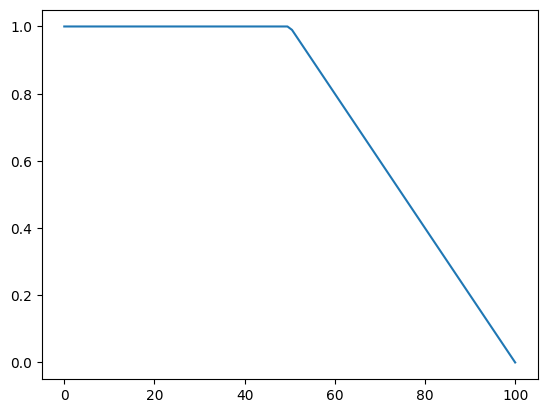

In [3]:
def create_accel(m=-1/50, x_step=100):
  c = 50
  x = np.linspace(0,100,x_step)
  y = np.linspace(0,100,x_step)
  for i, value in enumerate(x):
    if i < 50:
      y[i] = 1
    else:
      y[i] = m*value+2
  return x,y

x, y = create_accel()

plt.plot(x, y)
plt.show()

In [4]:
def show_accel(x):
  speed = x
  accel = y[int(x)]
  return speed, accel

In [5]:
class AccelerationModel:
    def __init__(self, m=-1/50, x_step=100):
        self.m = m
        self.x_step = x_step
        self.x, self.y = self.create_accel()

    def create_accel(self):
        x = np.linspace(0, 100, self.x_step)
        y = np.linspace(0, 100, self.x_step)
        for i, value in enumerate(x):
            if i < 50:
                y[i] = 1
            else:
                y[i] = self.m * value + 2
        return x, y

    def show_accel(self, x_value):
        speed = x_value
        accel = self.y[int(x_value)]
        return speed, accel

# Example usage
model = AccelerationModel()
speed, accel = model.show_accel(70)

print(f"Speed: {speed}, Acceleration: {accel}")

Speed: 70, Acceleration: 0.5858585858585856


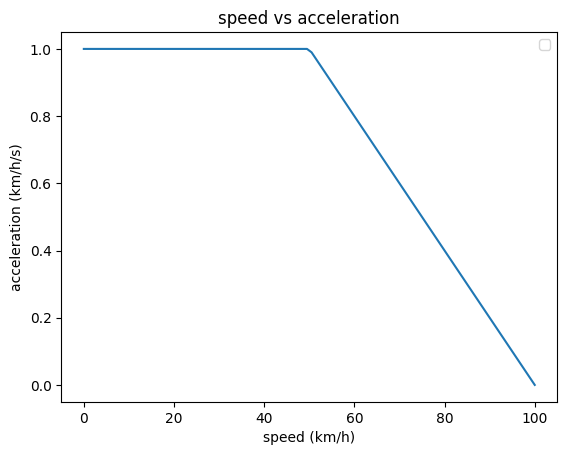

Speed: 96, Acceleration: 0.06060606060606055


In [6]:
model = AccelerationModel()
v_for_a, a_v = model.create_accel()

plt.plot(v_for_a, a_v)
plt.title('speed vs acceleration')
plt.xlabel('speed (km/h)')
plt.ylabel('acceleration (km/h/s)')
plt.legend()
plt.show()

speed, accel = model.show_accel(96)
print(f"Speed: {speed}, Acceleration: {accel}")

In [7]:
t = np.linspace(0,1000,1000)
s = np.linspace(0,1000,1000)

In [8]:
def acc(speed):
  m = -1/50
  if speed <= 50:
    a = 1
  elif 50 < speed <= 100:
    a = m * speed + 2
  else:
    a = 0
  return a

In [9]:
def decel(speed):
  if speed <= 20:
    a = -0.05
  elif speed > 20:
    a = -0.08
  else:
    a = 0
  return a

processing...
distance has been reached


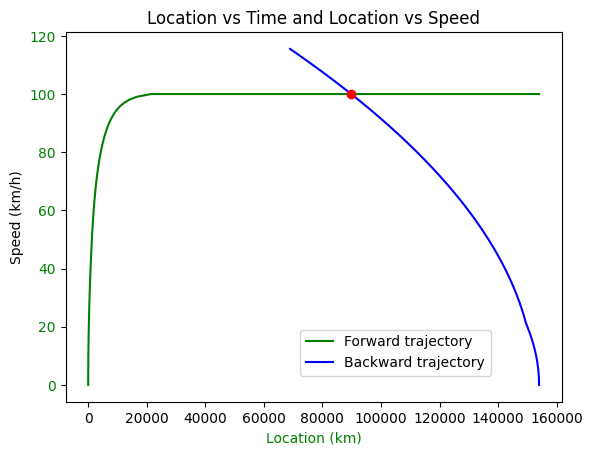

Intersection in x: 89843.35606561054 and y: 100.00200000000002


In [104]:
del a, s, v, t, df1, df2
del a1, s1, v1

def acc(speed):
  m = -1/50
  if speed <= 50:
    a = 1
  elif 50 < speed <= 100:
    a = m * speed + 2
  else:
    a = 0
  return a

def decel(speed):
  if speed <= 20:
    a = 0.05
  elif speed > 20:
    a = 0.08
  else:
    a = 0
  return a

target = 154000
dt = 0.1
t = np.arange(0,target,dt)
a0 = acc(0)
s0 = 0
v0 = 0
a = [a0]
v = [v0]
s = [s0]

if s[-1] >= target:
  print('distance has been reached')
else:
  print('processing...')

for i in range(1, len(t)):
  a.append(acc(int(v[i-1])))
  v.append(v[i-1] + 0.5*(a[i-1]+a[i]) * dt)
  s.append(s[i-1] + 0.5*(v[i-1]+v[i]) * dt)
  if s[-1] >= target:
    print('distance has been reached')
    t = np.arange(0,(i+1)*dt,dt)
    break

df1 = pd.DataFrame({'a':a,
              's':s,
              'v':v,
              't':t})


a0 = decel(0)
s0 = target
v0 = 0
a1 = [a0]
v1 = [v0]
s1 = [s0]
for i in range(1, len(t)):
  a1.append(decel(int(v1[i-1])))
  v1.append(v1[i-1] + 0.5*(a1[i-1]+a1[i]) * dt)
  s1.append(s1[i-1] - 0.5*(v1[i-1]+v1[i]) * dt)
  if s1[i] <= 0:
    print('distance has been reached')
    t = np.arange(0,(i+1)*dt,dt)
    break

df2 = pd.DataFrame({'a':a1,
              's':s1,
              'v':v1,
              't':t})

# Plot x vs t
fig, ax1 = plt.subplots()

ax1.plot(df1['s'], df1['v'], 'g-', label='Forward trajectory')
ax1.set_ylabel('Speed (km/h)')
ax1.set_xlabel('Location (km)', color='g', )
ax1.tick_params(axis='y', labelcolor='g')

ax1.plot(df2['s'], df2['v'], 'b-', label='Backward trajectory')
ax1.set_ylabel('Speed (km/h)')
ax1.set_xlabel('Location (km)', color='g', )
ax1.tick_params(axis='y', labelcolor='g')

# Create a secondary y-axis for x vs v
# ax2 = ax1.twinx()
# ax2.plot(s, v, 'b-', label='Distance vs Speed')
# ax2.set_ylabel('Speed (km/h)', color='b')
# ax2.tick_params(axis='y', labelcolor='b')

line_1 = LineString(np.column_stack((df1['s'], df1['v'])))
line_2 = LineString(np.column_stack((df2['s'], df2['v'])))
intersection = line_1.intersection(line_2)

plt.plot(*intersection.xy, 'ro')

# Add legends to each axis
fig.legend(loc='lower right', bbox_to_anchor=(0.8,0.15))
plt.title('Location vs Time and Location vs Speed')
plt.show()

x, y = intersection.xy
print(f'Intersection in x: {x[0]} and y: {y[0]}')

In [103]:
import metpy.calc as mpcalc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
xi, yi = mpcalc.find_intersections(t, df1['v'].to_list(), df2['v'].to_list())
print('x:', xi, 'y :', yi)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [70]:
df1.tail(100)

,a,s,v
3070302,0.02,90048.51715,99.983
3070303,0.08,90048.51715,99.973
3070304,0.02,90048.51615,99.983
3070305,0.08,90048.51615,99.973
3070306,0.02,90048.51615,99.973
...,...,...,...
3070397,0.08,90048.53035,100.013
3070398,0.00,90048.53000,100.013
3070399,0.08,90048.53000,100.005
3070400,0.00,90048.52910,100.014


In [71]:
range(1, len(t))

range(1, 1540000)

In [90]:
s[-1]
v[-1]
a[-1]

0.05

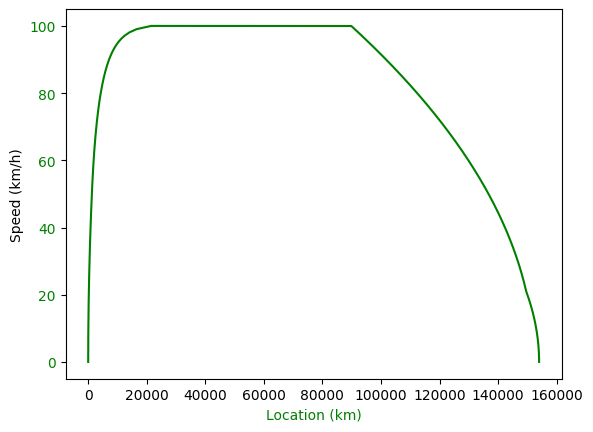

In [93]:
# del a,v,s

dt = 0.1
step_number = np.arange(0,1000/dt,dt)
a0 = acc(0)
s0 = 0
v0 = 0
a = [a0]
v = [v0]
s = [s0]

for i in range(1, len(step_number)):
  if int(s[-1]) <= x[0]:
    a.append(acc(int(v[i-1])))
    v.append(v[i-1] + 0.5*(a[i-1]+a[i]) * dt)
    s.append(s[i-1] + 0.5*(v[i-1]+v[i]) * dt)
  # print(s[-1])
  elif int(s[-1]) > x[0]:
    a.append(decel(int(v[i-1])))
    v.append(v[i-1] - 0.5*(a[i-1]+a[i]) * dt)
    s.append(s[i-1] + 0.5*(v[i-1]+v[i]) * dt)
    if v[-1] <= 0:
      break

fig, ax1 = plt.subplots()

ax1.plot(s[:-1], v[:-1], 'g-', label='Forward trajectory')
ax1.set_ylabel('Speed (km/h)')
ax1.set_xlabel('Location (km)', color='g', )
ax1.tick_params(axis='y', labelcolor='g')

In [23]:
df2.tail()

,a,s,v,t
16010,0.08,69000.331425,115.4785,1601.0
16011,0.08,68988.783175,115.4865,1601.1
16012,0.08,68977.234125,115.4945,1601.2
16013,0.08,68965.684275,115.5025,1601.3
16014,0.08,68954.133625,115.5105,1601.4


In [24]:
df_closest1 = df1.iloc[(df1['s']-x[0]).abs().argsort()[:1]]
df_closest1['s']

9597    89838.5399
Name: s, dtype: float64

In [12]:
df_closest2 = df2.iloc[(df2['s']-x[0]).abs().argsort()[:1]]
df_closest2

,a,s,v,t
14075,0.08,89847.731175,99.9985,1407.5


In [20]:
df2.tail()

,a,s,v,t
16010,0.08,69000.331425,115.4785,1601.0
16011,0.08,68988.783175,115.4865,1601.1
16012,0.08,68977.234125,115.4945,1601.2
16013,0.08,68965.684275,115.5025,1601.3
16014,0.08,68954.133625,115.5105,1601.4


In [13]:
data1 = df1.loc[:df_closest1.index[0]]
data2 = df2.loc[df_closest2.index[0]:]
data1.tail()

,a,s,v,t
9593,0.0,89798.5391,100.002,959.3
9594,0.0,89808.5393,100.002,959.4
9595,0.0,89818.5395,100.002,959.5
9596,0.0,89828.5397,100.002,959.6
9597,0.0,89838.5399,100.002,959.7


In [18]:
data2.head()

,a,s,v,t
14075,0.08,89847.731175,99.9985,1407.5
14076,0.08,89837.730925,100.0065,1407.6
14077,0.08,89827.729875,100.0145,1407.7
14078,0.08,89817.728025,100.0225,1407.8
14079,0.08,89807.725375,100.0305,1407.9


In [15]:
pd.concat([data1, data2], ignore_index=True)

,a,s,v,t
0,1.00,0.000000,0.0000,0.0
1,1.00,0.005000,0.1000,0.1
2,1.00,0.020000,0.2000,0.2
3,1.00,0.045000,0.3000,0.3
4,1.00,0.080000,0.4000,0.4
...,...,...,...,...
11533,0.08,69000.331425,115.4785,1601.0
11534,0.08,68988.783175,115.4865,1601.1
11535,0.08,68977.234125,115.4945,1601.2
11536,0.08,68965.684275,115.5025,1601.3
